In [416]:
import matplotlib.pyplot as plt
import numpy as np
import pyhf
import json

In [417]:
ws = pyhf.Workspace(json.load(open('3b_full-run-2_tag21.2.87-1_ExpSyst_139000_CCA_Gtt_0L_B_bkg.json')))

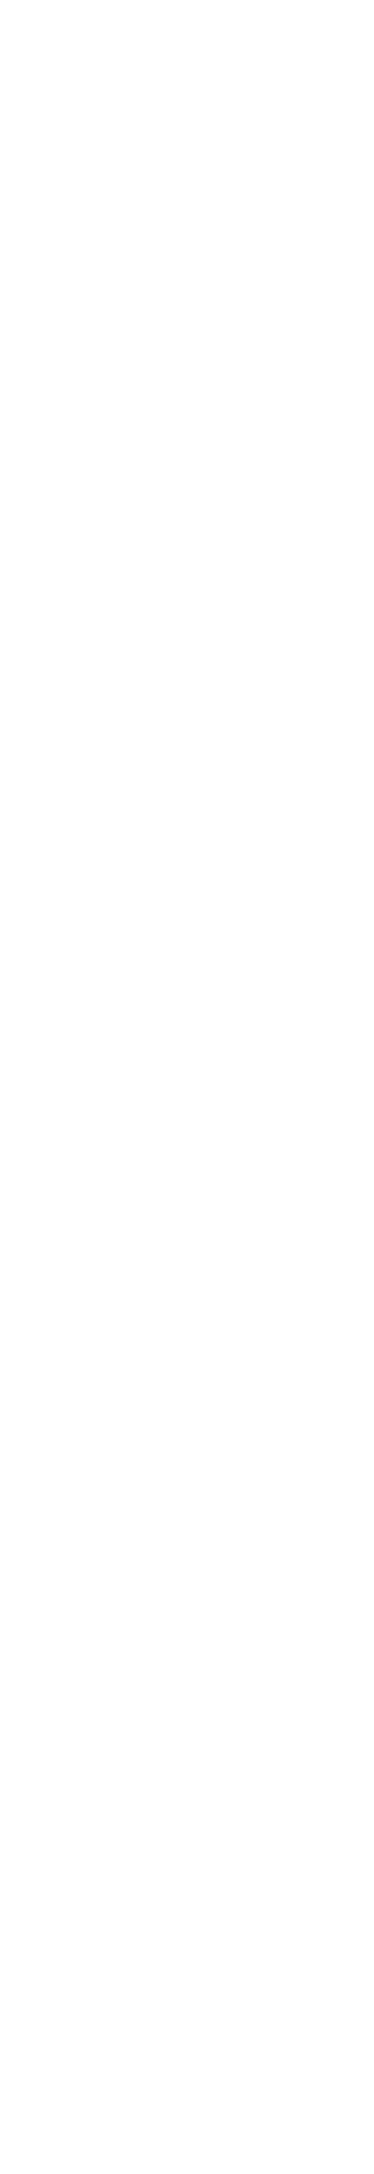

In [421]:
fig, axes = plt.subplots(nrows=len(ws.channels), ncols=len(ws.samples), sharex='col', sharey='all', figsize=(5, 30))
plt.setp(axes, visible=False)

for ax, channel_name in zip(axes[:,0], ws.channels):
    ax.set_ylabel(channel_name)
    ax.set_yticks(np.arange(len(ws.modifiers)))    
    
for ax, sample_name in zip(axes[-1,:], ws.samples):
    ax.set_xticks(np.arange(1))
    ax.set_xlabel(sample_name)

# y-axis is completely shared
axes[0,0].set_yticklabels(map('/'.join,ws.modifiers))
fig.tight_layout()

In [265]:
def build_data(ws, nbins, sample, debug=False):
    data = np.zeros((len(ws.modifiers), nbins))
    for modifier in sample['modifiers']:
        if modifier['type'] in ['lumi', 'normfactor']: continue
        mod_idx = ws.modifiers.index((modifier['name'], modifier['type']))
        if modifier['type'] == 'staterror':
            data[mod_idx] = np.true_divide(modifier['data'], sample['data'])
        elif modifier['type'] == 'normsys':
            data[mod_idx] = np.abs(modifier['data']['hi'] - modifier['data']['lo'])/2.0
        elif modifier['type'] == 'histosys':
            data[mod_idx] = np.abs(np.subtract(modifier['data']['hi_data'], modifier['data']['lo_data']))/2.0
        else:
            raise RuntimeError(f'cannot handle {modifier}.')
        if debug: print(modifier['type'], sample['data'], modifier['data'], data[mod_idx])
    return data

In [199]:
for channel in ws['channels']:
    channel_idx = ws.channels.index(channel['name'])
    nbins = ws.channel_nbins[channel['name']]
    for sample in channel['samples']:
        sample_idx = ws.samples.index(sample['name'])
        ax = axes[channel_idx][sample_idx]
        ax.set_visible(True)
        im = ax.imshow(build_data(ws, nbins, sample), vmin=0, vmax=1, cmap='Greys')
        
#fig.subplots_adjust(right=0.8)
#cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
#fig.colorbar(im, cax=cbar_ax)

In [200]:
fig.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)

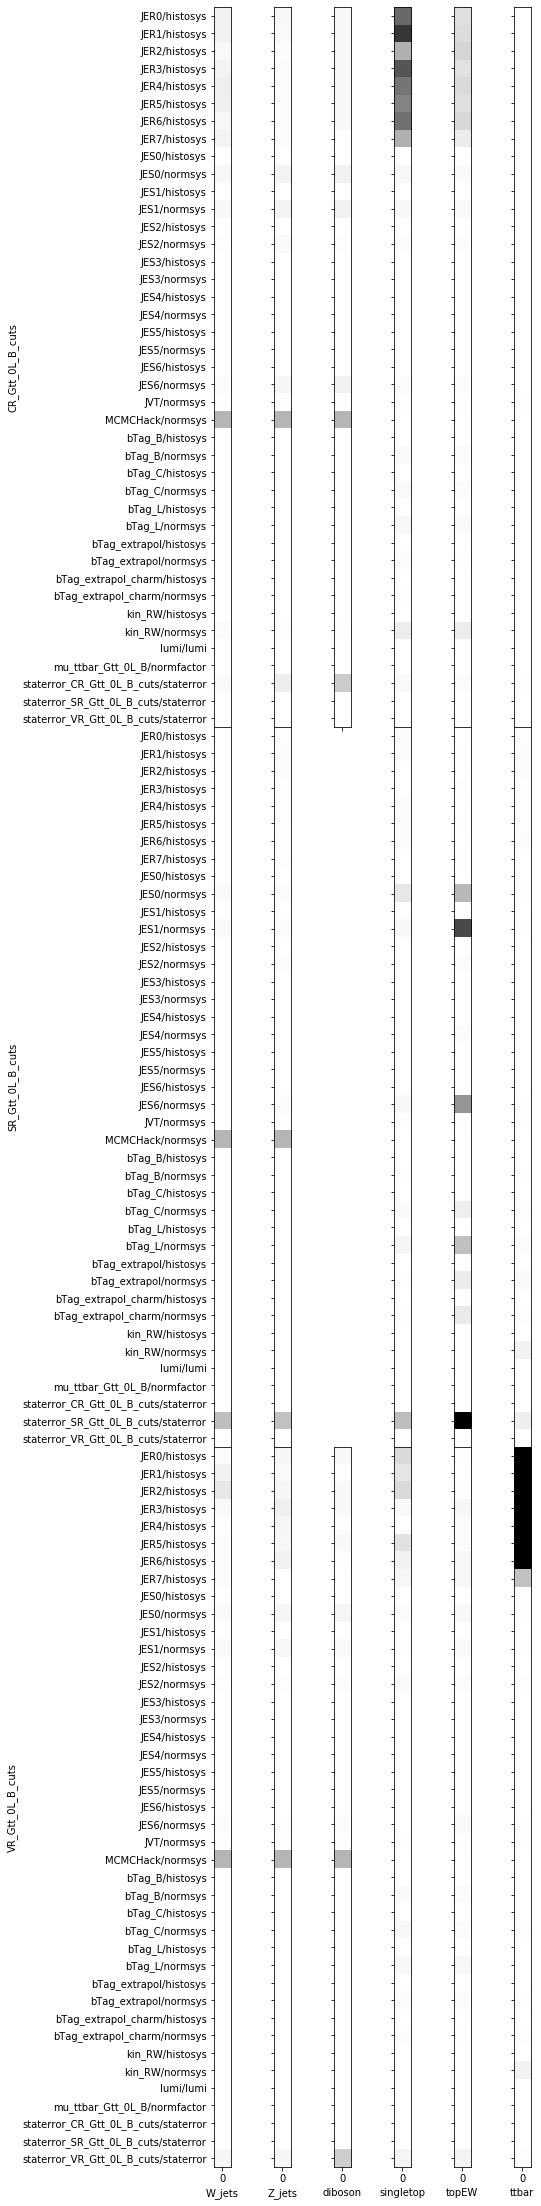

In [201]:
fig

[Text(0, 0, 'JER0/histosys'),
 Text(0, 0, 'JER1/histosys'),
 Text(0, 0, 'JER2/histosys'),
 Text(0, 0, 'JER3/histosys'),
 Text(0, 0, 'JER4/histosys'),
 Text(0, 0, 'JER5/histosys'),
 Text(0, 0, 'JER6/histosys'),
 Text(0, 0, 'JER7/histosys'),
 Text(0, 0, 'JES0/histosys'),
 Text(0, 0, 'JES0/normsys'),
 Text(0, 0, 'JES1/histosys'),
 Text(0, 0, 'JES1/normsys'),
 Text(0, 0, 'JES2/histosys'),
 Text(0, 0, 'JES2/normsys'),
 Text(0, 0, 'JES3/histosys'),
 Text(0, 0, 'JES3/normsys'),
 Text(0, 0, 'JES4/histosys'),
 Text(0, 0, 'JES4/normsys'),
 Text(0, 0, 'JES5/histosys'),
 Text(0, 0, 'JES5/normsys'),
 Text(0, 0, 'JES6/histosys'),
 Text(0, 0, 'JES6/normsys'),
 Text(0, 0, 'JVT/normsys'),
 Text(0, 0, 'MCMCHack/normsys'),
 Text(0, 0, 'bTag_B/histosys'),
 Text(0, 0, 'bTag_B/normsys'),
 Text(0, 0, 'bTag_C/histosys'),
 Text(0, 0, 'bTag_C/normsys'),
 Text(0, 0, 'bTag_L/histosys'),
 Text(0, 0, 'bTag_L/normsys'),
 Text(0, 0, 'bTag_extrapol/histosys'),
 Text(0, 0, 'bTag_extrapol/normsys'),
 Text(0, 0, 'bTag_ex

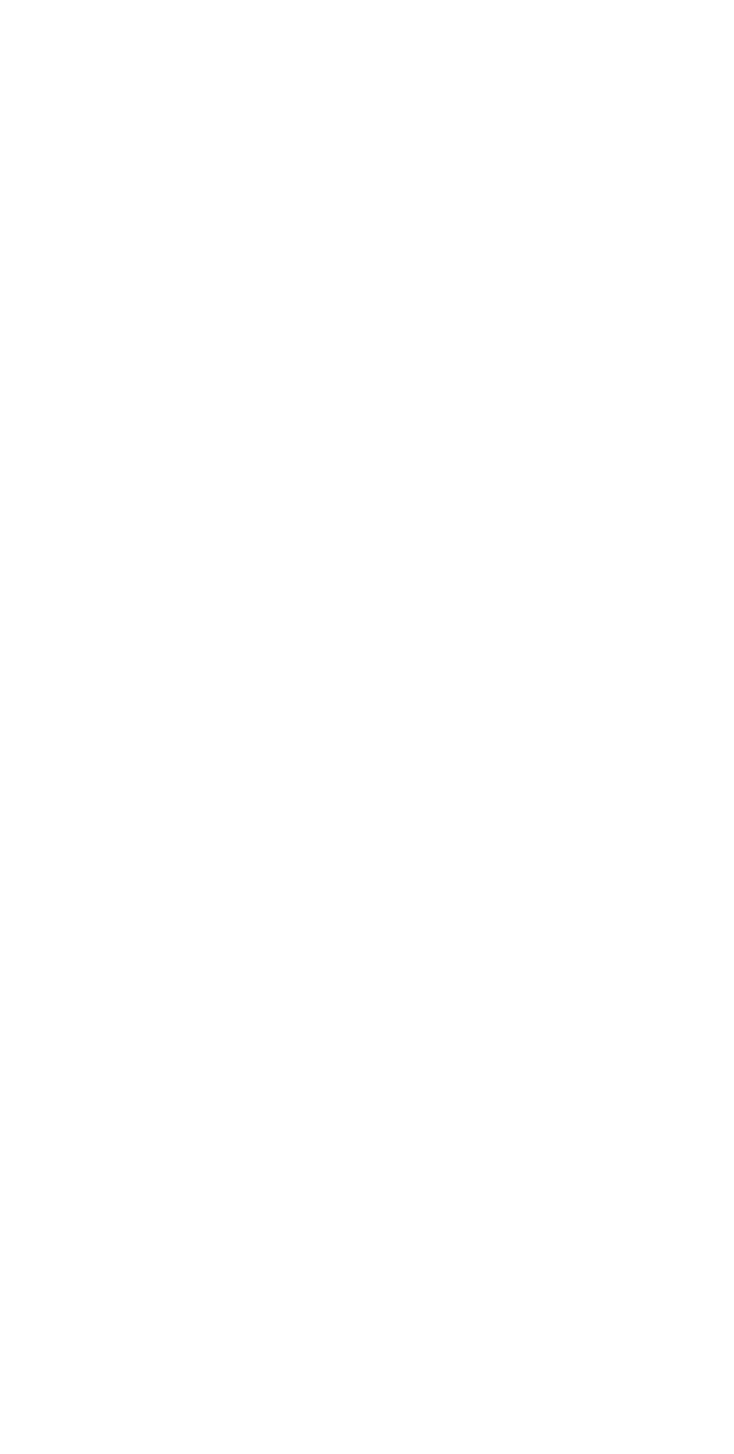

In [412]:
fig, axes = plt.subplots(nrows=1, ncols=len(ws.channels), sharey='all', figsize=(10, 20))
plt.setp(axes, visible=False)

for ax, channel_name in zip(axes, ws.channels):
    xticks = np.arange(0,len(ws.samples)*2*ws.channel_nbins[channel_name],2)
    ax.set_xlabel(channel_name)
    ax.set_xticks(xticks)
    ax.set_xticklabels(ws.samples, rotation=45)
    ax.set_xticks(xticks+1, minor=True)
    ax.set_yticks(np.arange(len(ws.modifiers)))
    
# y-axis is completely shared
axes[0].set_yticklabels(map('/'.join,ws.modifiers))

In [413]:
def build_data(ws, nbins, sample, debug=False):
    data = np.zeros((len(ws.modifiers), nbins*2))
    for modifier in sample['modifiers']:
        if modifier['type'] in ['lumi', 'normfactor']: continue
        mod_idx = ws.modifiers.index((modifier['name'], modifier['type']))
        if modifier['type'] == 'staterror':
            data[mod_idx] = np.tile(np.true_divide(modifier['data'], sample['data']),2)
        elif modifier['type'] == 'normsys':
            data[mod_idx] = np.abs(modifier['data']['hi'] - modifier['data']['lo'])/2.0
        elif modifier['type'] == 'histosys':
            data[mod_idx] = np.tile(np.abs(np.subtract(modifier['data']['hi_data'], modifier['data']['lo_data']))/2.0,2)
        else:
            raise RuntimeError(f'cannot handle {modifier}.')
        if debug: print(modifier['type'], sample['data'], modifier['data'], data[mod_idx])
    return data

In [414]:
for channel in ws['channels']:
    channel_idx = ws.channels.index(channel['name'])
    nbins = ws.channel_nbins[channel['name']]
    im_data = np.zeros((len(ws.samples), len(ws.modifiers), nbins*2))
    for sample in channel['samples']:
        sample_idx = ws.samples.index(sample['name'])
        im_data[sample_idx] = build_data(ws, nbins, sample)
    axes[channel_idx].pcolormesh(im_data.reshape(-1, len(ws.samples)*2), vmin=0, vmax=1, cmap='Greys')
    axes[channel_idx].set_aspect('equal')
    axes[channel_idx].set_visible(True)
    axes[channel_idx].grid(True, which='major', axis='both', linestyle='dashed', color='tab:red', alpha=0.5)
    axes[channel_idx].grid(True, which='minor', axis='x', linestyle='dotted', color='grey', alpha=0.5)

fig.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)

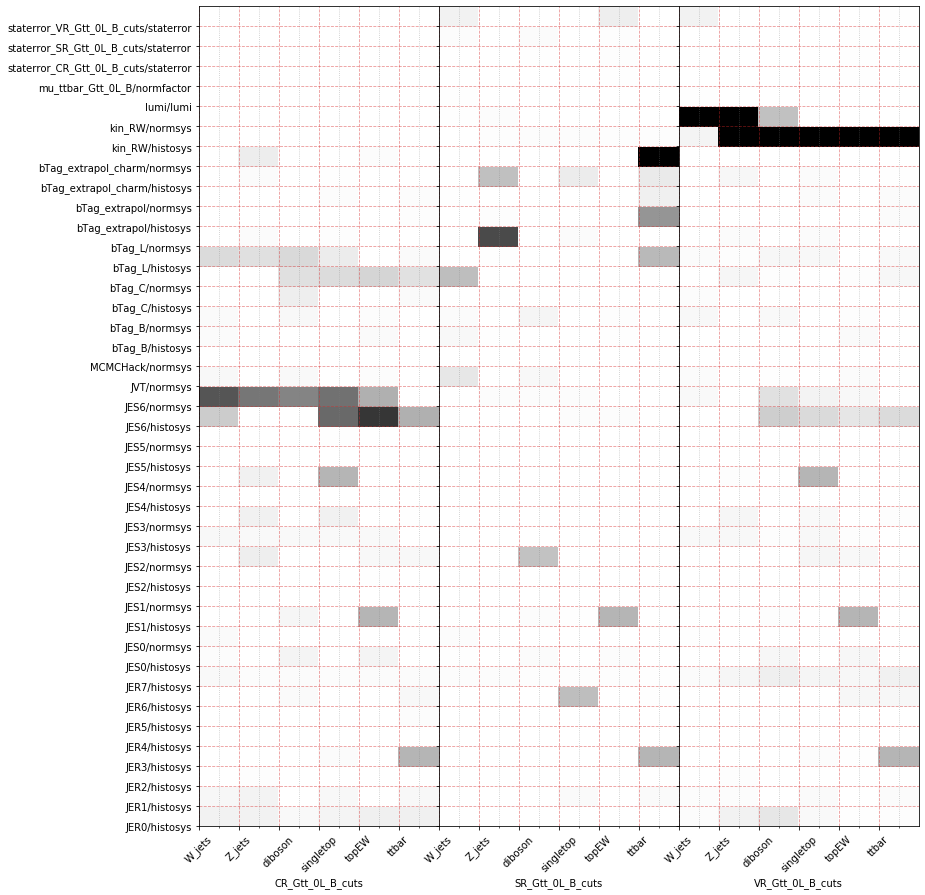

In [415]:
fig